### ISSUES
RONA has only one env in offset_level_scores['RONA']

### TODO

- add shapes to rda scatter that indicate structcrxn
    - shapes for other programs too (eg env for RONA)

<a id='home'></a>
### purpose

For a given offset permutation (ie levels in `level_scores[program]['garden_performance']['offset_level']`), take the garden with the median validation score and see how that validation score scales with the proportion of clinal loci (clinal loci are a subset of causal loci)

In [1]:
from pythonimports import *
from myfigs import save_pdf

import MVP_06_validate_RONA as mvp06
import MVP_summary_functions as mvp

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns
from scipy.stats import spearmanr

t1 = dt.now()  # notebook timer

slimdir = '/work/lotterhos/MVP-Offsets/run_20220919/slimdir'
summarydir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries'
figdir = makedir(op.join(summarydir, 'figs/03_proportion_of_clinal_loci'))
pkldir = op.join(summarydir, 'all_performance_dicts')

mvp.latest_commit()
session_info.show()

#########################################################
Today:	February 09, 2023 - 10:33:08
python version: 3.8.5

Current commit of pythonimports:
commit b5f64910f19a2f05c80319052d8d8ce5edc6765a  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Mon Jan 30 10:30:11 2023 -0500

Current commit of MVP_offsets:
commit caa0fefccc33fb9bba80c1589c9992c24b1ca836  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Thu Feb 9 10:32:41 2023 -0500
#########################################################



# get validation scores

In [2]:
# get validation scores across gardens across reps
all_scores = mvp.combine_level_dicts(use_bcs_data=False)

reading reps (use_bcs_data = False): 100%|███████████████| 5/5 [00:07<00:00,  1.45s/it]


0-225
	 RONA num seeds =  224
	 lfmm2 num seeds =  224
	 GF num seeds =  224
	 rda num seeds =  224


225-450
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


450-675
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


675-900
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


900-1125
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225



 RONA df.shape = (674400, 15) num_seeds = 1124 num_reps = 5

 lfmm2 df.shape = (404400, 16) num_seeds = 1124 num_reps = 5

 GF df.shape = (337200, 15) num_seeds = 1124 num_reps = 5

 rda df.shape = (1078400, 17) num_seeds = 1124 num_reps = 5


In [3]:
programs = keys(all_scores)

programs

['RONA', 'lfmm2', 'GF', 'rda']

In [4]:
all_scores['GF'].head()

,garden,score,glevel,plevel,pleio,slevel,landscape,popsize,migration,marker_set,seed,simulation_level,noncausal_env,offset_level,rep,simulation_garden,final_LA,cor_TPR_temp,cor_TPR_sal
1231095,1,-0.903434,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,2,-0.905051,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,3,-0.909899,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,4,-0.914747,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,5,-0.911515,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN


# get simulation info

proportion of clinal loci = 'cor_TPR_temp' and 'cor_TPR_sal' from `summary` dataframe

In [5]:
summary = mvp.get_summary_data()
summary.head()

,seed,n_samp_tot,n_samp_per_pop,sd_fitness_among_inds,sd_fitness_among_pops,final_LA,K,Bonf_alpha,numCausalLowMAFsample,all_corr_phen_temp,subsamp_corr_phen_temp,all_corr_phen_sal,subsamp_corr_phen_sal,num_causal_prefilter,num_causal_postfilter,num_non_causal,num_neut_prefilter,num_neut_postfilter,num_neut_neutralgenome,num_causal_temp,num_causal_sal,num_multiallelic,meanFst,va_temp_total,va_sal_total,Va_temp_sample,Va_sal_sample,nSNPs,median_causal_temp_cor,median_causal_sal_cor,median_neut_temp_cor,median_neut_sal_cor,cor_VA_temp_prop,cor_VA_sal_prop,cor_TPR_temp,cor_TPR_sal,cor_FDR_allSNPs_temp,cor_FDR_neutSNPs_temp,cor_FDR_allSNPs_sal,cor_FDR_neutSNPs_sal,num_causal_sig_temp_corr,num_causal_sig_sal_corr,num_notCausal_sig_temp_corr,num_notCausal_sig_sal_corr,num_neut_sig_temp_corr,num_neut_sig_sal_corr,cor_AUCPR_temp_allSNPs,cor_AUCPR_temp_neutSNPs,cor_AUCPR_sal_allSNPs,cor_AUCPR_sal_neutSNPs,...,RDA_Va_temp_prop_corr,RDA_Va_sal_prop,RDA_Va_sal_prop_corr,RDA_TPR,RDA_TPR_corr,RDA_FDR_allSNPs,RDA_FDR_allSNPs_corr,num_RDA_sig_causal,num_RDA_sig_neutral,num_RDA_sig_causal_corr,num_RDA_sig_neutral_corr,RDA_FDR_neutSNPs,RDA_FDR_neutSNPs_corr,RDA_AUCPR_allSNPs,RDA_AUCPR_neutSNPs,RDA_AUCPR_neutSNPs_corr,RDA_FPR_neutSNPs,RDA_FPR_neutSNPs_corr,RDA_RDAmutpred_cor_tempEffect,RDA_RDAmutpred_cor_salEffect,RDA_absRDAmutpred_cor_tempVa,RDA_absRDAmutpred_cor_salVa,RDA_RDAmutpred_cor_tempEffect_structcorr,RDA_RDAmutpred_cor_salEffect_structcorr,RDA_absRDAmutpred_cor_tempVa_structcorr,RDA_absRDAmutpred_cor_salVa_structcorr,RDA_cor_RDA20000temppredict_tempPhen,RDA_cor_RDA20000salpredict_salPhen,RDA_cor_RDA20000temppredict_tempPhen_structcorr,RDA_cor_RDA20000salpredict_salPhen_structcorr,cor_PC1_temp,cor_PC1_sal,cor_PC2_temp,cor_PC2_sal,cor_LFMMU1_temp,cor_LFMMU1_sal,cor_LFMMU2_temp,cor_LFMMU2_sal,cor_PC1_LFMMU1_temp,cor_PC1_LFMMU1_sal,cor_PC2_LFMMU1_temp,cor_PC2_LFMMU1_sal,gwas_TPR_sal,gwas_TPR_temp,gwas_FDR_sal_neutbase,gwas_FDR_temp_neutbase,clinalparadigm_sal_proptop5GWASclines,clinalparadigm_temp_proptop5GWASclines,clinalparadigm_sal_propsigGWASclines,clinalparadigm_temp_propsigGWASclines
1231094,1231094,1000,10,0.052726,0.019773,0.500854,2,0.000002,39.0,0.954579,0.889339,NaN,NaN,2628,310,25753,26587,26587,12867,310,0,0,0.180395,0.011850,0.0,0.013565,0.0,26063,0.358044,NaN,0.382053,0.048169,0.845160,0.0,0.461290,NaN,0.989445,0.979124,NaN,NaN,143,0,13405,0,6707,0,0.010640,0.021480,NaN,NaN,...,0.000000,0.0,0.0,0.006452,0.000000,0.991870,1.000000,2,118,0,200,0.983333,1.000000,0.008250,0.016479,0.015977,0.009171,0.015544,0.256624,NaN,-0.042518,NaN,0.171161,NaN,0.002951,NaN,0.853088,NaN,-0.035417,NaN,-0.993822,-0.002423,-0.020407,-0.001688,0.070280,-0.001851,-0.237415,-0.002823,-0.092317,0.999553,0.992696,0.001340,NaN,0.229032,NaN,0.966791,NaN,0.655411,NaN,0.605030
1231095,1231095,1000,10,0.045199,0.015411,0.505075,9,0.000002,104.0,0.954576,0.900696,NaN,NaN,3144,382,28511,30284,30284,14060,382,0,0,0.169858,0.013437,0.0,0.012768,0.0,28893,0.413816,NaN,0.453650,0.041759,0.784642,0.0,0.531414,NaN,0.988613,0.976989,NaN,NaN,203,0,17625,0,8619,0,0.010539,0.021306,NaN,NaN,...,0.017427,0.0,0.0,0.041885,0.015707,0.995350,0.996698,16,1545,6,867,0.989750,0.993127,0.008917,0.018571,0.018248,0.109886,0.061664,0.270934,NaN,-0.063837,NaN,0.169557,NaN,0.011549,NaN,0.866174,NaN,0.024705,NaN,-0.976352,-0.002856,0.156995,0.006663,-0.640360,-0.002312,0.161181,-0.000200,0.754972,0.996311,0.650453,0.084016,NaN,0.327225,NaN,0.969675,NaN,0.538408,NaN,0.579408
1231096,1231096,1000,10,0.053489,0.020227,0.499265,9,0.000002,22.0,0.972302,0.887332,NaN,NaN,3149,482,32661,33031,33031,16379,480,0,0,0.133961,0.014053,0.0,0.013705,0.0,33143,0.415703,NaN,0.402932,0.038441,0.783006,0.0,0.541667,NaN,0.985459,0.971101,NaN,NaN,260,0,17620,0,8737,0,0.012861,0.025461,NaN,NaN,...,0.000000,0.0,0.0,0.010373,0.000000,0.995752,1.000000,5,526,0,458,0.990584,1.000000,0.009025,0.017848,0.018203,0.032114,0.027963,0.319978,NaN,-0.061561,NaN,0.259027,NaN,-0.006744,NaN,0.845862,NaN,0.129277,NaN,-

# determine validation scores per permutation

2-trait sims, median score

In [6]:
offset_scores = defaultdict(dict)

nrow_counter = defaultdict(Counter)
for program in all_scores:
    
    df = all_scores[program].copy()
    df = df[df['plevel'] != '1-trait']  # 2-trait only
    
    num_reps = luni(df.rep)
    
    found = False
    for offset_level in pbar(uni(df['offset_level']), desc=program):
        if offset_level.endswith('all') is False:
            continue
        
        odf = df[df.offset_level == offset_level].copy()
        
        assert nrow(odf) in [100*num_reps, 200*num_reps], nrow(odf)
        if nrow(odf) > 100*num_reps:
            nrow_counter[program][nrow(odf)] += 1
        
        assert luni(odf.index) == num_reps
        seed = odf.index.tolist()[0]
        
        offset_scores[program][seed] = odf.score.median()
        
        found = True
        
    assert found is True
    
nrow_counter

rda: 100%|███████████████| 720/720 [00:06<00:00, 110.81it/s]


defaultdict(collections.Counter,
            {'RONA': Counter({1000: 180}), 'rda': Counter({1000: 180})})

# make line fig

x axis: for each seed, calculate the total proportion of causal loci

y axis: for each seed, single metric of performance for each method 


In [7]:
def get_scatter_df(program, parameter, col):
    """Create data frame for input to seaborn.lmplot."""
    df = pd.DataFrame(
        {parameter : all_scores[program][parameter].to_dict()}
    )

    df[col] = df.index.map(summary[col])
    df['tau'] = df.index.astype(str).map(offset_scores[program])

    df = df[df.tau.notnull()]

    return df

RONA glevel
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_glevel_temp.pdf


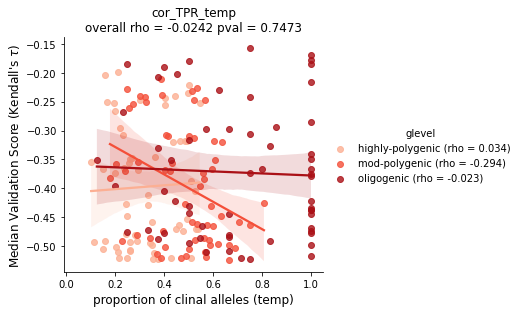

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_glevel_sal.pdf


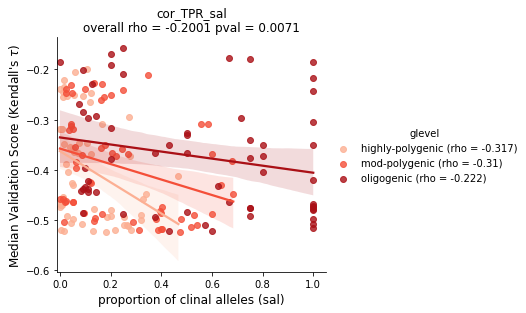

lfmm2 glevel
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_glevel_temp.pdf


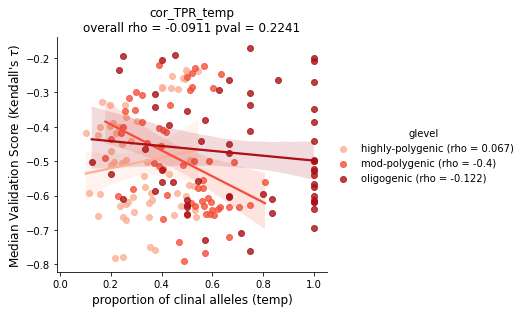

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_glevel_sal.pdf


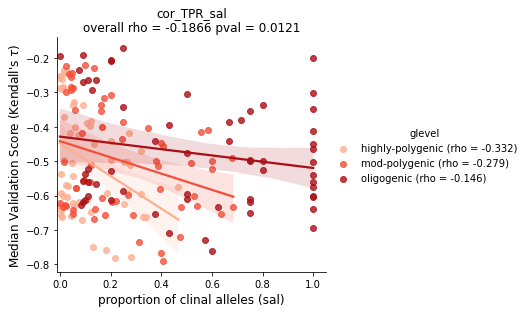

GF glevel
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_glevel_temp.pdf


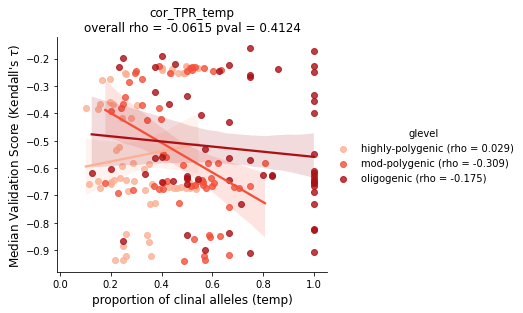

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_glevel_sal.pdf


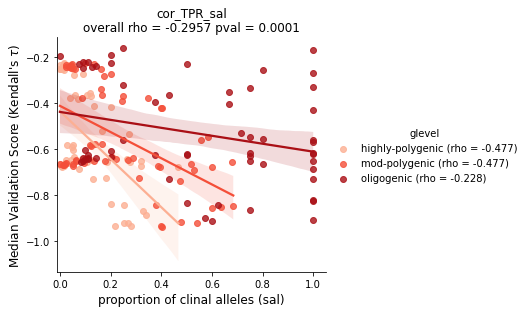

rda glevel
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_glevel_temp.pdf


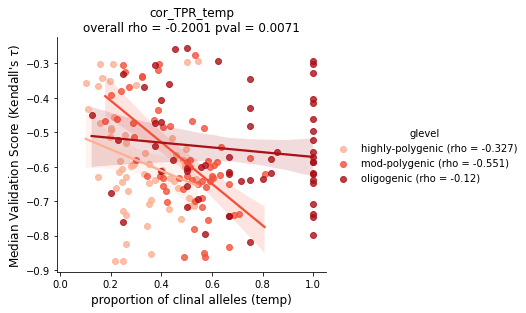

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_glevel_sal.pdf


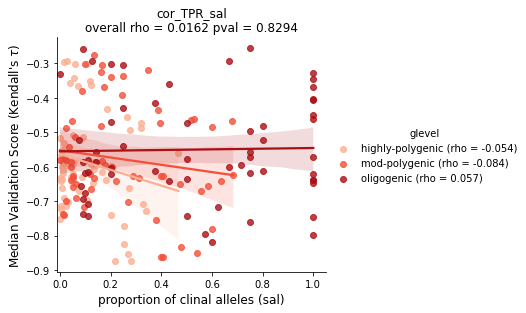

RONA pleio
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_pleio_temp.pdf


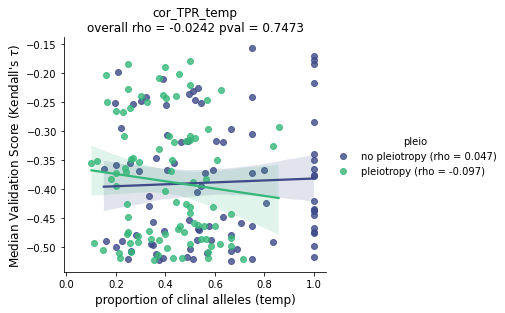

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_pleio_sal.pdf


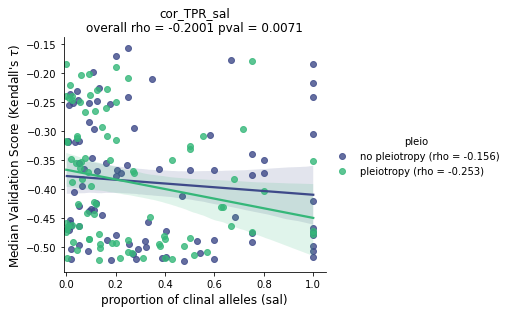

lfmm2 pleio
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_pleio_temp.pdf


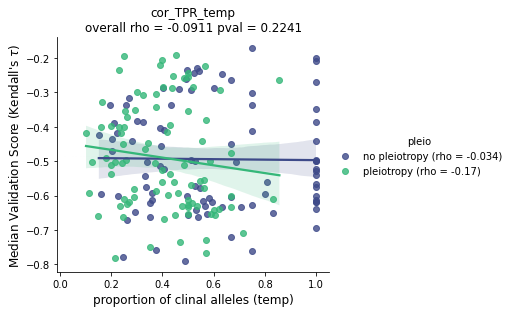

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_pleio_sal.pdf


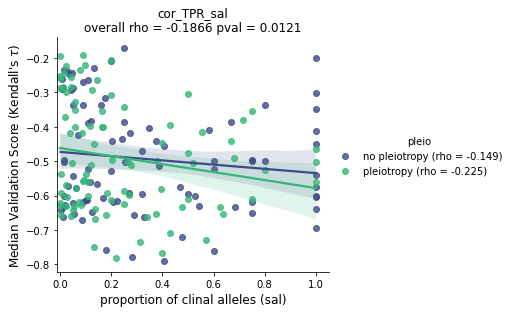

GF pleio
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_pleio_temp.pdf


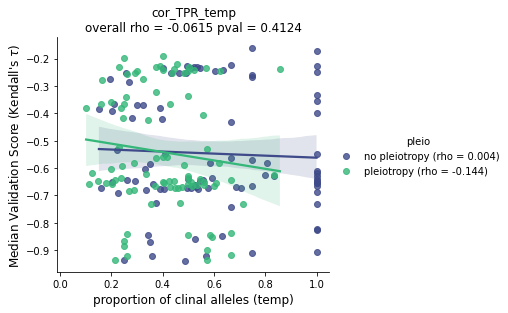

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_pleio_sal.pdf


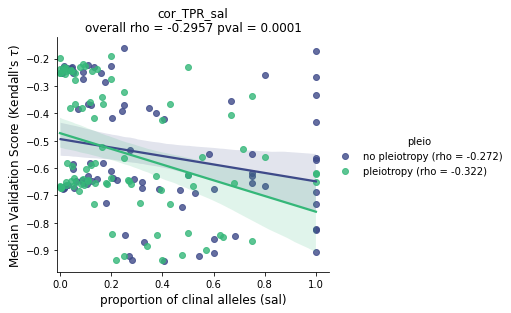

rda pleio
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_pleio_temp.pdf


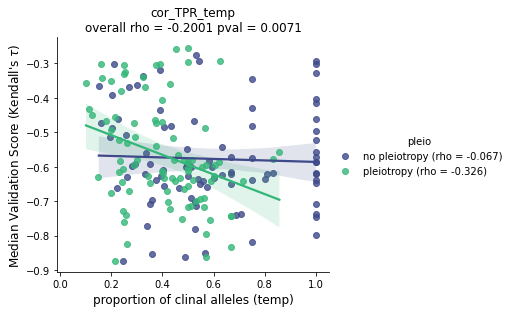

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_pleio_sal.pdf


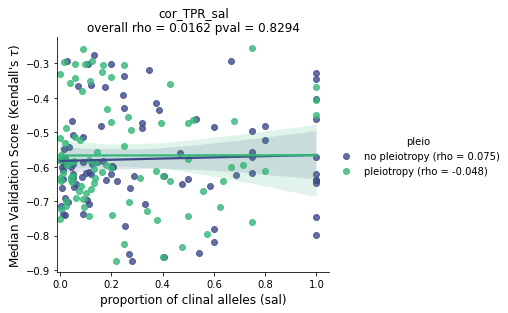

RONA slevel
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_slevel_temp.pdf


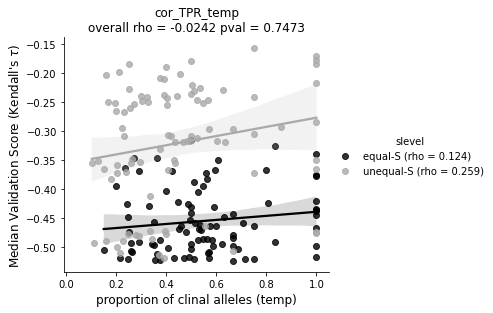

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_slevel_sal.pdf


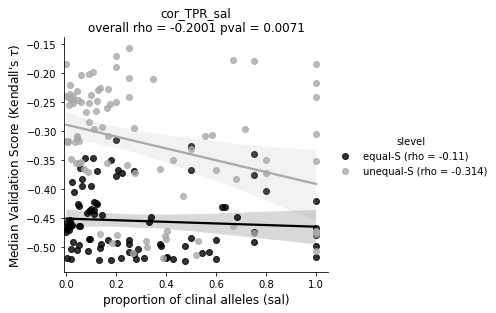

lfmm2 slevel
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_slevel_temp.pdf


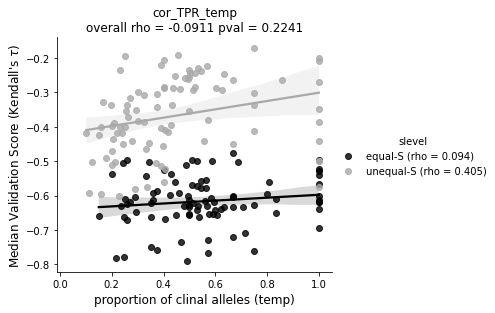

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_slevel_sal.pdf


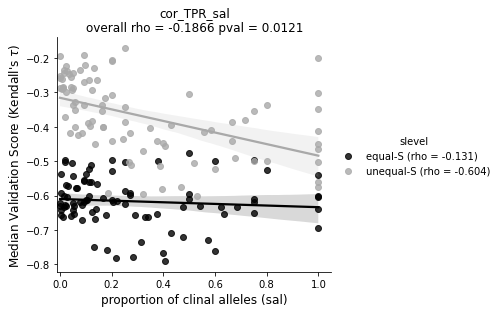

GF slevel
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_slevel_temp.pdf


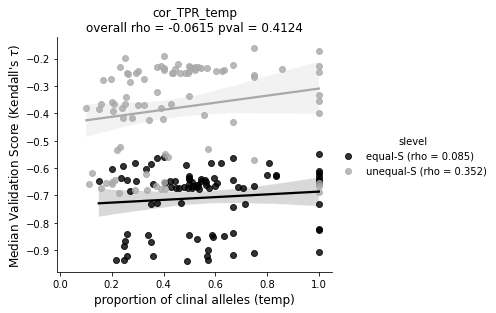

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_slevel_sal.pdf


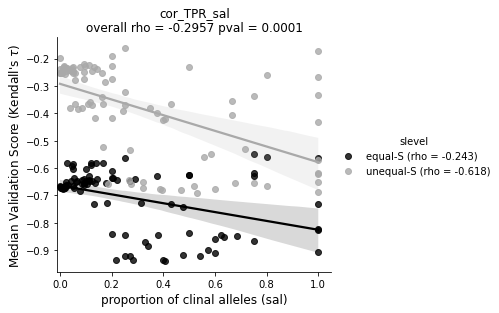

rda slevel
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_slevel_temp.pdf


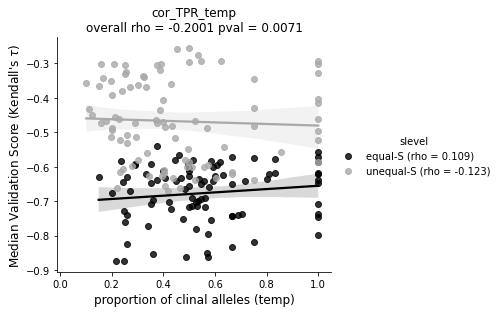

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_slevel_sal.pdf


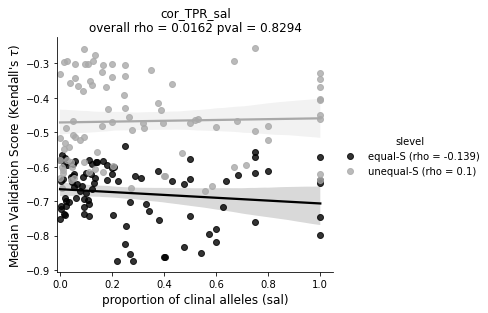

RONA landscape
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_landscape_temp.pdf


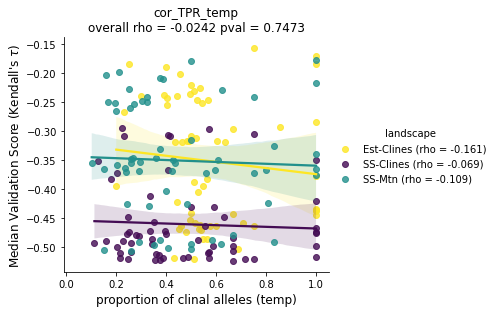

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_landscape_sal.pdf


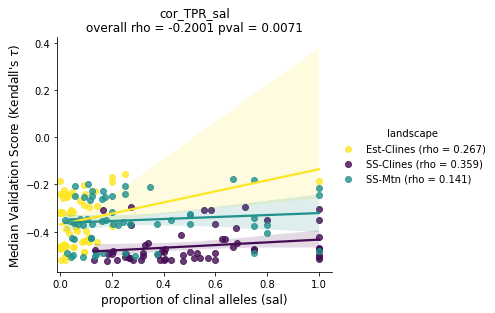

lfmm2 landscape
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_landscape_temp.pdf


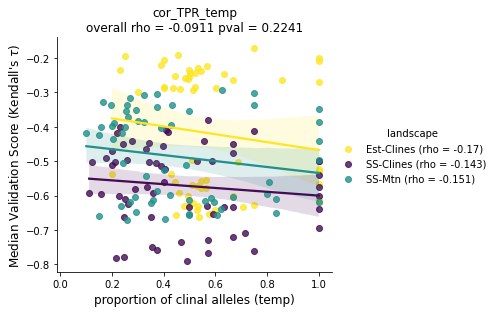

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_landscape_sal.pdf


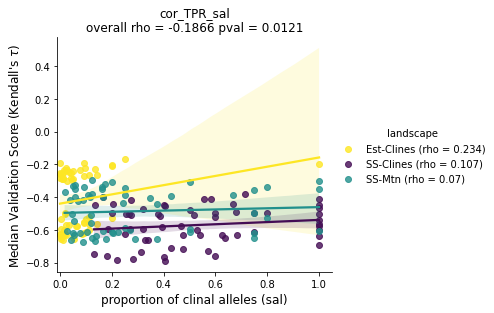

GF landscape
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_landscape_temp.pdf


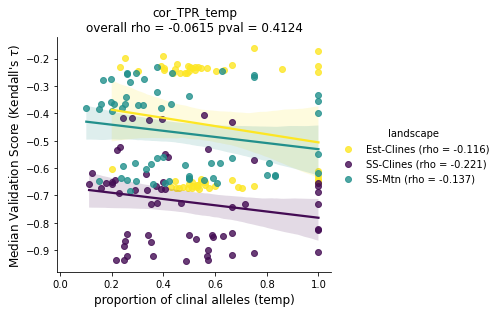

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_landscape_sal.pdf


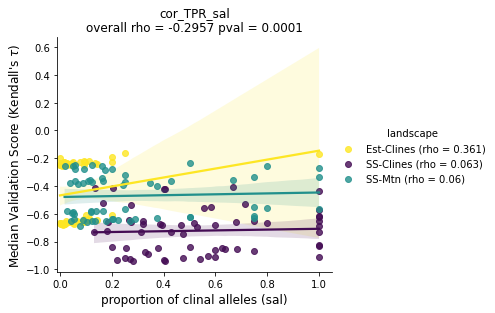

rda landscape
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_landscape_temp.pdf


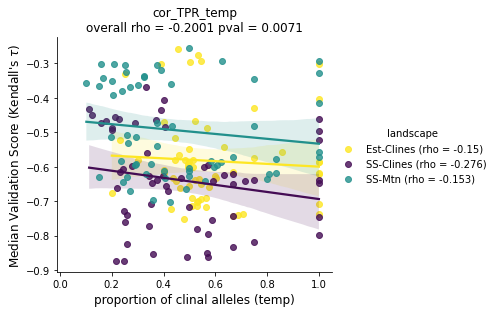

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_landscape_sal.pdf


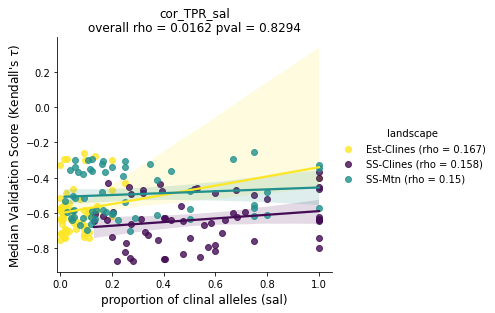

RONA popsize
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_popsize_temp.pdf


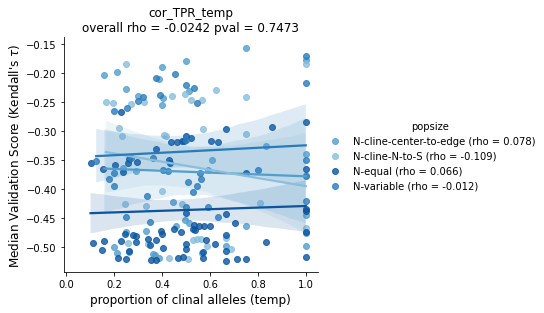

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_popsize_sal.pdf


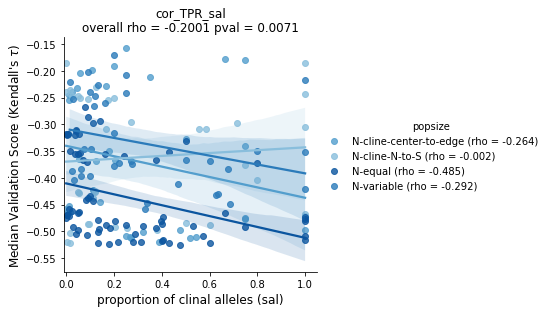

lfmm2 popsize
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_popsize_temp.pdf


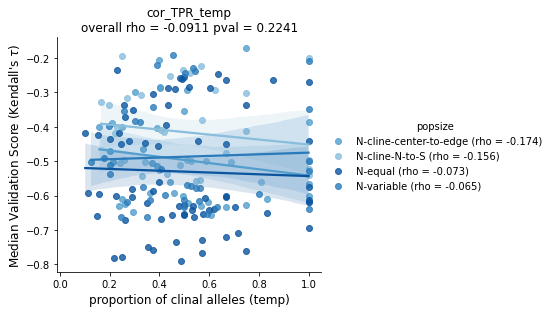

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_popsize_sal.pdf


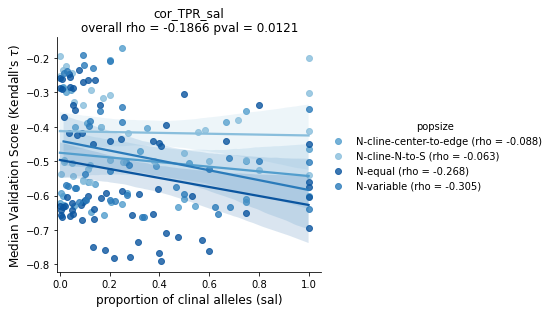

GF popsize
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_popsize_temp.pdf


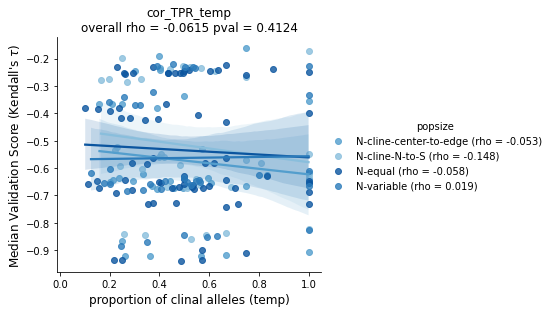

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_popsize_sal.pdf


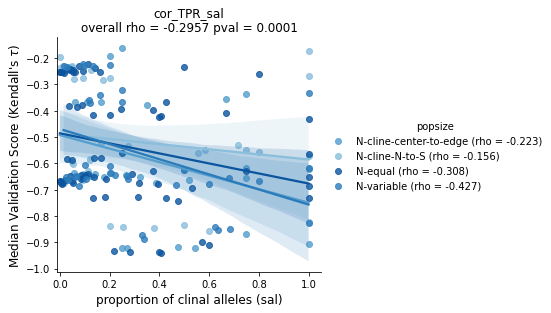

rda popsize
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_popsize_temp.pdf


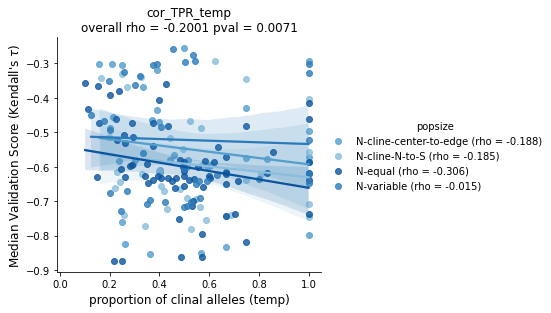

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_popsize_sal.pdf


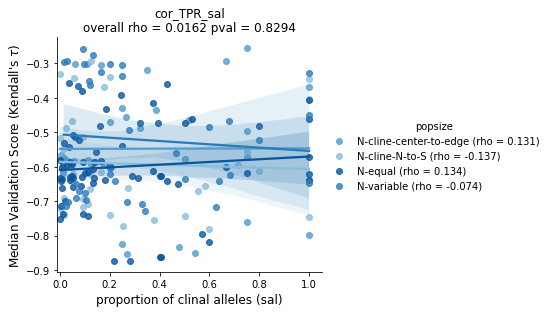

RONA migration
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_migration_temp.pdf


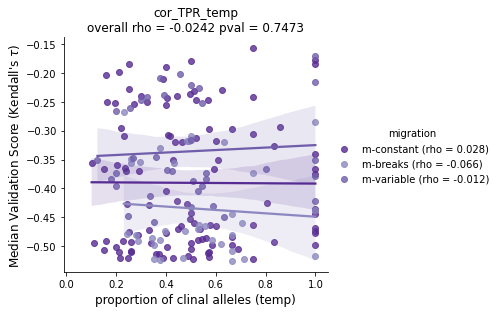

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/RONA_proportion_vs_validation_migration_sal.pdf


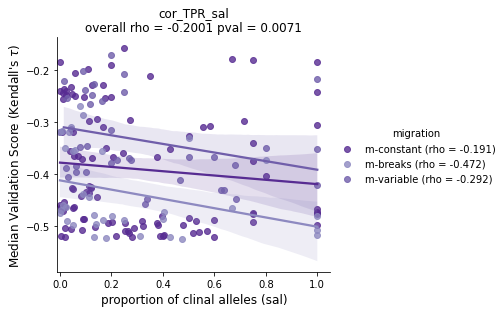

lfmm2 migration
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_migration_temp.pdf


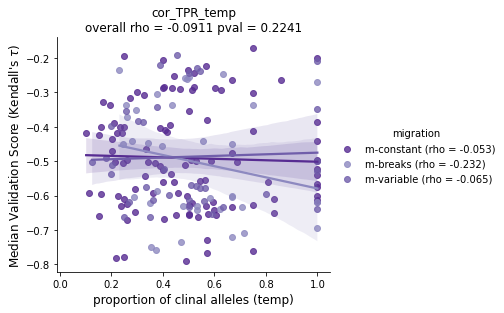

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/lfmm2_proportion_vs_validation_migration_sal.pdf


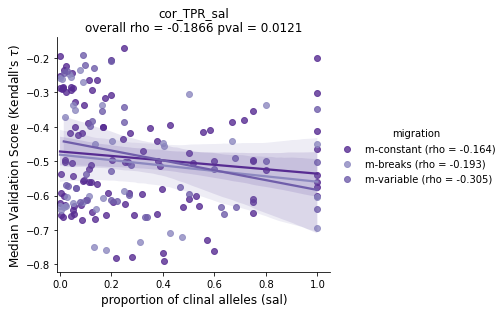

GF migration
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_migration_temp.pdf


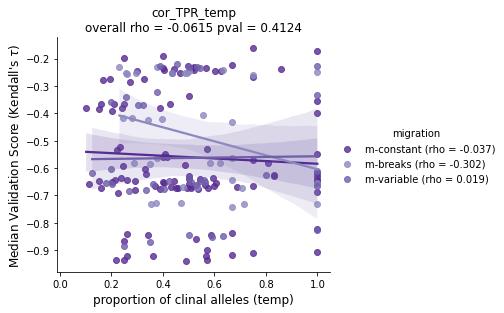

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/GF_proportion_vs_validation_migration_sal.pdf


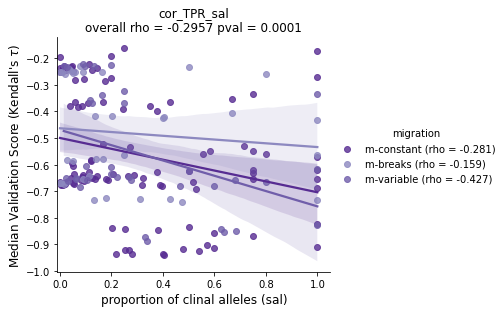

rda migration
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_migration_temp.pdf


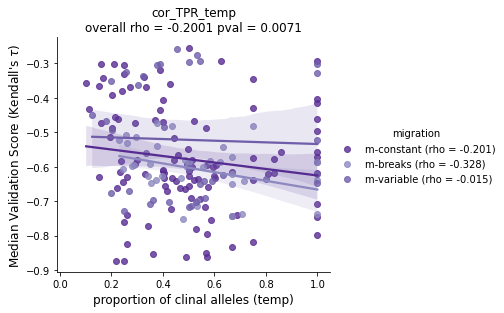

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_migration_sal.pdf


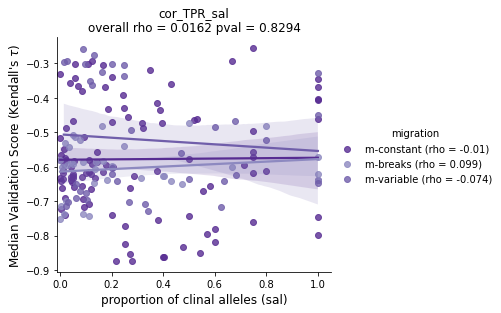

In [8]:
parameters = ['glevel', 'pleio', 'slevel', 'landscape', 'popsize', 'migration']
cols = ['cor_TPR_temp', 'cor_TPR_sal']

savelocs = []
for parameter in parameters:
    for program in offset_scores:
        print(ColorText(f'{program} {parameter}').bold())
        # what color are the sublevels of `parameter`? key=seed val=color hash
        seed_colors = all_scores[program][parameter].map(mvp.boxplot_kwargs['palette']).to_dict()
        
        for col in cols:
            data = get_scatter_df(program, parameter, col)
            # get correlations between x (col) and y (validation score) for each subgroup
            rhos = {}
            for param in data[parameter].unique():
                paramdf = data[data[parameter]==param]
                rho = round(spearmanr(paramdf[col],
                                      paramdf['tau'],
                                      nan_policy='omit').correlation,
                            3)
                label = f'{param} ({rho = })'  # legend label
                mvp.boxplot_kwargs['palette'].update({label : mvp.boxplot_kwargs['palette'][param]})
                rhos[param] = label
            data[parameter] = data[parameter].map(rhos)  # overwrite so legend reflects subgroup correlation
            
            # make scatter, add regressions + legend
            g = sns.lmplot(
                data=data, x=col, y='tau', hue=parameter, palette=mvp.boxplot_kwargs['palette'],
                height=4, aspect=1.25
            )
            
            g.set_axis_labels(x_var='proportion of clinal alleles (%s)' % col.split('_')[-1],
                              y_var="Median Validation Score (Kendall's $\\tau$)",
                              fontsize=12)
            
            # calculate overal relationship between x and y
            corr, pval = (round(val, 4) for val in spearmanr(data[col], data['tau'], nan_policy='omit'))
            
            # set xlim and fig title
            g.set(xlim=(-0.01, 1.05), title=f"{col}\noverall rho = {corr} {pval = }")
            
            # save
            env = col.split("_")[-1]
            saveloc = op.join(figdir, f'{program}_proportion_vs_validation_{parameter}_{env}.pdf')
            assert saveloc not in savelocs
            savelocs.append(saveloc)
            save_pdf(saveloc)
            plt.show()


### compare proportion of clinal of each env to validation score

x axis: proportion of clinal temp

y axis: proportion of clinal sal

color of data: performance

In [9]:
summary.head()

,seed,n_samp_tot,n_samp_per_pop,sd_fitness_among_inds,sd_fitness_among_pops,final_LA,K,Bonf_alpha,numCausalLowMAFsample,all_corr_phen_temp,subsamp_corr_phen_temp,all_corr_phen_sal,subsamp_corr_phen_sal,num_causal_prefilter,num_causal_postfilter,num_non_causal,num_neut_prefilter,num_neut_postfilter,num_neut_neutralgenome,num_causal_temp,num_causal_sal,num_multiallelic,meanFst,va_temp_total,va_sal_total,Va_temp_sample,Va_sal_sample,nSNPs,median_causal_temp_cor,median_causal_sal_cor,median_neut_temp_cor,median_neut_sal_cor,cor_VA_temp_prop,cor_VA_sal_prop,cor_TPR_temp,cor_TPR_sal,cor_FDR_allSNPs_temp,cor_FDR_neutSNPs_temp,cor_FDR_allSNPs_sal,cor_FDR_neutSNPs_sal,num_causal_sig_temp_corr,num_causal_sig_sal_corr,num_notCausal_sig_temp_corr,num_notCausal_sig_sal_corr,num_neut_sig_temp_corr,num_neut_sig_sal_corr,cor_AUCPR_temp_allSNPs,cor_AUCPR_temp_neutSNPs,cor_AUCPR_sal_allSNPs,cor_AUCPR_sal_neutSNPs,...,RDA_Va_temp_prop_corr,RDA_Va_sal_prop,RDA_Va_sal_prop_corr,RDA_TPR,RDA_TPR_corr,RDA_FDR_allSNPs,RDA_FDR_allSNPs_corr,num_RDA_sig_causal,num_RDA_sig_neutral,num_RDA_sig_causal_corr,num_RDA_sig_neutral_corr,RDA_FDR_neutSNPs,RDA_FDR_neutSNPs_corr,RDA_AUCPR_allSNPs,RDA_AUCPR_neutSNPs,RDA_AUCPR_neutSNPs_corr,RDA_FPR_neutSNPs,RDA_FPR_neutSNPs_corr,RDA_RDAmutpred_cor_tempEffect,RDA_RDAmutpred_cor_salEffect,RDA_absRDAmutpred_cor_tempVa,RDA_absRDAmutpred_cor_salVa,RDA_RDAmutpred_cor_tempEffect_structcorr,RDA_RDAmutpred_cor_salEffect_structcorr,RDA_absRDAmutpred_cor_tempVa_structcorr,RDA_absRDAmutpred_cor_salVa_structcorr,RDA_cor_RDA20000temppredict_tempPhen,RDA_cor_RDA20000salpredict_salPhen,RDA_cor_RDA20000temppredict_tempPhen_structcorr,RDA_cor_RDA20000salpredict_salPhen_structcorr,cor_PC1_temp,cor_PC1_sal,cor_PC2_temp,cor_PC2_sal,cor_LFMMU1_temp,cor_LFMMU1_sal,cor_LFMMU2_temp,cor_LFMMU2_sal,cor_PC1_LFMMU1_temp,cor_PC1_LFMMU1_sal,cor_PC2_LFMMU1_temp,cor_PC2_LFMMU1_sal,gwas_TPR_sal,gwas_TPR_temp,gwas_FDR_sal_neutbase,gwas_FDR_temp_neutbase,clinalparadigm_sal_proptop5GWASclines,clinalparadigm_temp_proptop5GWASclines,clinalparadigm_sal_propsigGWASclines,clinalparadigm_temp_propsigGWASclines
1231094,1231094,1000,10,0.052726,0.019773,0.500854,2,0.000002,39.0,0.954579,0.889339,NaN,NaN,2628,310,25753,26587,26587,12867,310,0,0,0.180395,0.011850,0.0,0.013565,0.0,26063,0.358044,NaN,0.382053,0.048169,0.845160,0.0,0.461290,NaN,0.989445,0.979124,NaN,NaN,143,0,13405,0,6707,0,0.010640,0.021480,NaN,NaN,...,0.000000,0.0,0.0,0.006452,0.000000,0.991870,1.000000,2,118,0,200,0.983333,1.000000,0.008250,0.016479,0.015977,0.009171,0.015544,0.256624,NaN,-0.042518,NaN,0.171161,NaN,0.002951,NaN,0.853088,NaN,-0.035417,NaN,-0.993822,-0.002423,-0.020407,-0.001688,0.070280,-0.001851,-0.237415,-0.002823,-0.092317,0.999553,0.992696,0.001340,NaN,0.229032,NaN,0.966791,NaN,0.655411,NaN,0.605030
1231095,1231095,1000,10,0.045199,0.015411,0.505075,9,0.000002,104.0,0.954576,0.900696,NaN,NaN,3144,382,28511,30284,30284,14060,382,0,0,0.169858,0.013437,0.0,0.012768,0.0,28893,0.413816,NaN,0.453650,0.041759,0.784642,0.0,0.531414,NaN,0.988613,0.976989,NaN,NaN,203,0,17625,0,8619,0,0.010539,0.021306,NaN,NaN,...,0.017427,0.0,0.0,0.041885,0.015707,0.995350,0.996698,16,1545,6,867,0.989750,0.993127,0.008917,0.018571,0.018248,0.109886,0.061664,0.270934,NaN,-0.063837,NaN,0.169557,NaN,0.011549,NaN,0.866174,NaN,0.024705,NaN,-0.976352,-0.002856,0.156995,0.006663,-0.640360,-0.002312,0.161181,-0.000200,0.754972,0.996311,0.650453,0.084016,NaN,0.327225,NaN,0.969675,NaN,0.538408,NaN,0.579408
1231096,1231096,1000,10,0.053489,0.020227,0.499265,9,0.000002,22.0,0.972302,0.887332,NaN,NaN,3149,482,32661,33031,33031,16379,480,0,0,0.133961,0.014053,0.0,0.013705,0.0,33143,0.415703,NaN,0.402932,0.038441,0.783006,0.0,0.541667,NaN,0.985459,0.971101,NaN,NaN,260,0,17620,0,8737,0,0.012861,0.025461,NaN,NaN,...,0.000000,0.0,0.0,0.010373,0.000000,0.995752,1.000000,5,526,0,458,0.990584,1.000000,0.009025,0.017848,0.018203,0.032114,0.027963,0.319978,NaN,-0.061561,NaN,0.259027,NaN,-0.006744,NaN,0.845862,NaN,0.129277,NaN,-

In [10]:
def compare_clinal_proportions(data, title, validation_scores, cmap=None, norm=None, saveloc=None):
    """Create a figure showing relationship between proportion of clinal alleles and validation score."""
    g = sns.JointGrid(data=data, x='cor_TPR_temp', y='cor_TPR_sal')
    g.plot_joint(sns.regplot, line_kws={'zorder': 0}, color='gray')
    g.plot_joint(sns.scatterplot,
                 s=75,
                 c=data.seed.astype(str).map(validation_scores).apply(mvp06.color, cmap=cmap, norm=norm).tolist(),
                )
    g.plot_marginals(sns.histplot, color='gray', bins=40)

    # add color bar
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar_ax = g.fig.add_axes([1.01, 0.09, 0.03, 0.68])
    ticks = [x/10 for x in range(-10, math.ceil(10*norm.vmax), 1)]  # range of -1 to max validation_scores
    cbar = g.fig.colorbar(sm,
                          ax=g.ax_joint,
                          cax=cbar_ax,
                          ticks=ticks)
    cbar.ax.set_yticklabels(["{:.1f}".format(i) for i in ticks]) # add the labels
    cbar.set_label(label="median validation score\n(Kendall's $\\tau$)", fontdict=dict(fontsize=15))

    # make pretty
    g.fig.suptitle(title)
    g.ax_joint.set_xlabel('proportion of clinal alleles - temp', fontsize=12)
    g.ax_joint.set_ylabel('proportion of clinal alleles - sal', fontsize=12)
    g.fig.set_size_inches((8, 7.2))
    plt.tight_layout()

    if saveloc is not None:
        save_pdf(saveloc)

    plt.show()

    pass


/tmp/ipykernel_267919/2450658223.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_migration_sal.pdf


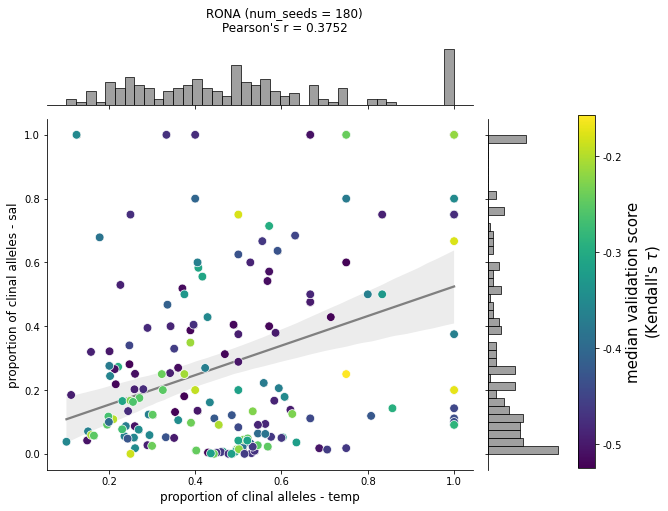

/tmp/ipykernel_267919/2450658223.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_migration_sal.pdf


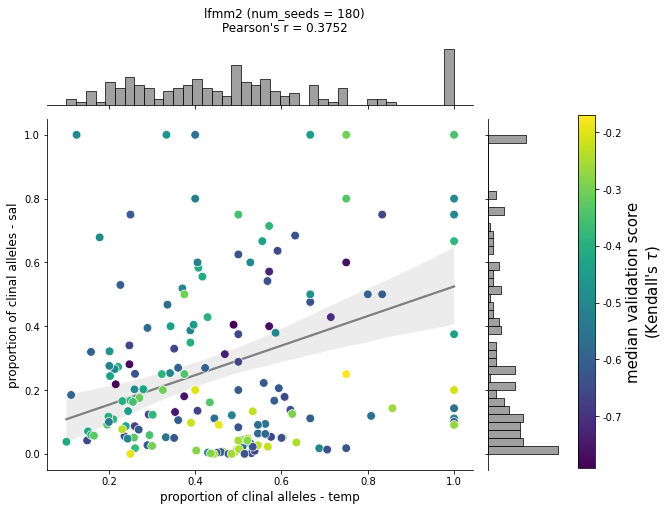

/tmp/ipykernel_267919/2450658223.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_migration_sal.pdf


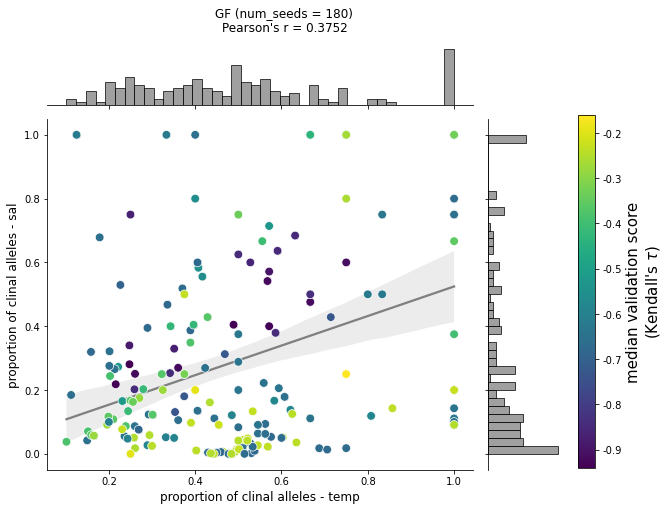

/tmp/ipykernel_267919/2450658223.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/03_proportion_of_clinal_loci/rda_proportion_vs_validation_migration_sal.pdf


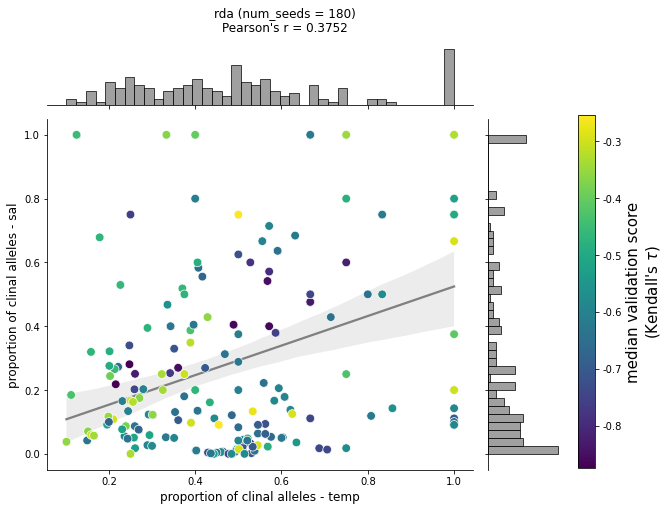

In [11]:
# for deciding what color each point should get (color is validation score)
cmap = plt.cm.get_cmap('viridis')

# plot scatter plots
for program, validation_scores in offset_scores.items():
    # reduce summary to only those seeds in offset_scores[program]
    cordf = summary[
        summary.seed.astype(str).isin(
            keys(validation_scores)
        )
    ].copy()
    
    # find max validation score for color bar
    norm = Normalize(vmin=min(validation_scores.values()), vmax=max(validation_scores.values()))
    
    # relationship between clinal proportions
    r = round(cordf['cor_TPR_temp'].corr(cordf['cor_TPR_sal'], method='pearson'),
              4)
    
    # plot scatter
    compare_clinal_proportions(data=cordf,
                               title=f"{program} (num_seeds = {len(validation_scores)})\nPearson's r = {r}",
                               validation_scores=validation_scores,
                               cmap=cmap,
                               norm=norm,
                               saveloc=saveloc)

# compare distribution of median scores

,RONA,lfmm2,GF,rda
1231138,-0.247879,-0.382222,-0.369142,-0.361204
1231143,-0.387677,-0.569293,-0.650303,-0.714747
1231281,-0.508081,-0.450909,-0.432929,-0.620725
1231239,-0.228485,-0.399596,-0.365284,-0.304979
1231290,-0.486667,-0.558213,-0.640300,-0.693498


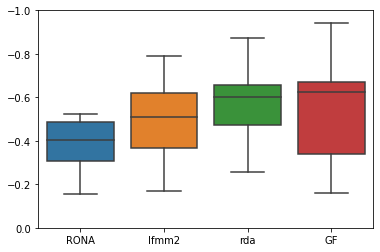

In [12]:
level_df = pd.DataFrame(offset_scores)

display(level_df.head())

g = sns.boxplot(data=level_df,
                order=level_df.min().sort_values(ascending=False).index.tolist())

g.set(ylim=(0, -1))

plt.show()

In [13]:
# notebook timer
formatclock(dt.now() - t1, exact=True)

'0-00:01:35'